In [133]:
import numpy
import matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [134]:
# hnu 
lam=arange(1,191)
hnu=zeros(190)
h = 6.626e-34 #  Plank constant Joul*s
c=3.e8 # m/s 
hnu[:]=h*c/lam[:]*1.e9

In [135]:
# open file with EUV data
doy=250
fname="ssi_"+str(doy)+'_2005.dat'
euv=zeros(190)
euvDAY=zeros(190*1440).reshape(190,1440) # flux in energy
euvPHD=zeros(190*1440).reshape(190,1440) # flux in phot
tmp=zeros(190)

In [136]:
fil=open(fname,"r")
for i in range(3):
       fil.readline()
j=0
while(1):
        try:
            minut=int(fil.readline())
           # print minut
        except:
            break
        euvL=(fil.readline().split())
        for i in range(190):
            euv[i]=float(euvL[i])
        euvDAY[:,j]=euv[:]
        j=j+1
        
fil.close()   
# solar flux in phot
for i in range(1440):
    euvPHD[:,i]=euvDAY[:,i]/hnu[:]*1.e-4*1.e-9 # norm on 10^9 for 
nD=len(euvDAY[:,0])

In [137]:
#read low resolution spectr
mSP=loadtxt('spectr.dat',skiprows=3)
N=len(mSP[:,0])
#print mSP[:,0],mSP[:,1]

#low and high boundary intervals in angstrom
lowB=zeros(N+1).astype(int)
highB=zeros(N+1).astype(int)
# intervals in nanometers
highB10=zeros(N+1).astype(int)
lowB10=zeros(N+1).astype(int)
bon=zeros(N+1)
highB[0]=50
for i in range(1,N+1):
    lowB[i]=int(mSP[i-1,1])
    highB[i]=int(mSP[i-1,2])
bon=(lowB+highB)*.5

#Combine two spectral line (303 A)
lowB[8:-1]=lowB[9:]

highB[8:-1]=highB[9:]
# Last line - Laymann alpha
lowB[N]=1220
highB[N]=1220

highB10[0]=int((highB[0])/10.+0.5)
lowB10[0]=int((lowB[0])/10.+0.5)
for i in range(N+1):
    highB10[i]=int((highB[i])/10.+0.5)
    lowB10[i]=int((lowB[i])/10.+0.5)
    if(highB10[i]==highB10[i-1]):
        highB10[i]=highB10[i]+1
        lowB10[i]=highB10[i]
#print lowB10
#print highB10

In [138]:
euvLine=zeros(N+1)
euvLOW=zeros(N+1)
mNAN=zeros(N+1).astype(int)
#cycle for lambda
#search i where lowB=highB
k=0
for i in range(N+1):
    if(lowB10[i]==highB10[i]):
        mNAN[k]=i
       # print mNAN[k],highB10[mNAN[k]]
        k=k+1


In [139]:
k=0
i=int(mNAN[k])
tmp[:]=euvPHD[:,0]
for kh in range(0,nD):
    #print int((highB[i]))
    if(highB10[i]==kh):
        euvLine[i]=euvPHD[kh-1,0]
        tmp[kh-1]=nan
        k=k+1
        #print i,highB10[i],k-1,kh,euvPHD[kh-1,0],euvLine[i]
        i=int(mNAN[k])


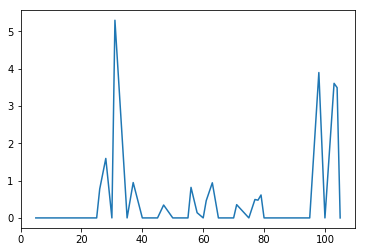

In [140]:
plot(highB10[:-1],euvLine[:-1])

In [141]:
euvLOW[0]=nansum(tmp[0:6])
for kh in range(1,N+1):
    ikb=lowB10[kh]
    ikh=highB10[kh]
    #print ikb,ikh,'_____'
    if(ikb!=ikh):
        euvLOW[kh]=nansum(tmp[ikb:ikh])
       # print ikb,ikh,kh,tmp[ikb:ikh],euvLOW[kh]

(0, 6)

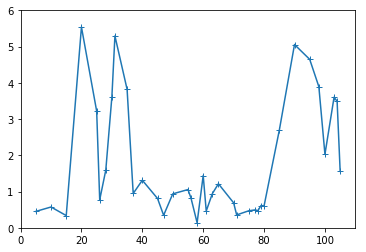

In [142]:
plot(highB10[:-1],euvLine[:-1]+euvLOW[:-1],'+-')
#plot(highB10[:-1],euvLOW[:-1])
ylim([0,6])

In [143]:
print sum(euvLOW[:-1]+euvLine[:-1]),sum(euvPHD[:106,0])#,sum(tmp1[:])

66.3104999497 66.8263234732


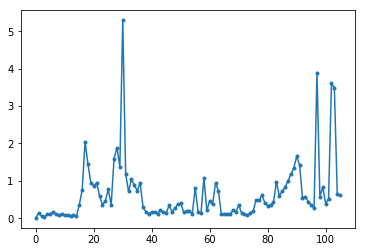

In [144]:
#plot in photon/cm2*s-1*10**9 
plot(euvPHD[0:106,0],'.-') 